In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [73]:
#static dielectric constant of water
def static_dia_water(T):
    e_w0 = 88.045 - 0.4147*T + 6.295*1e-4*T**2 + 1.075e-5*T**3
    return e_w0

def chill_t_water(T):
    relax_t = (1.1109e-10 - 3.824e-12*T + 6.938e-14*T**2 - 5.096e-16*T**3) / (2*np.pi) # T in C
    return relax_t

def dielectric_water(f, T):
    e_inf = 4.9
    e_w0 = static_dia_water(T)
    rt = chill_t_water(T)

    test=e_inf+(e_w0-e_inf)/(1+np.pi*f*rt*2j)
    e_real=np.real(test)
    e_imag=np.imag(test)

    return e_real, e_imag


### Question 1

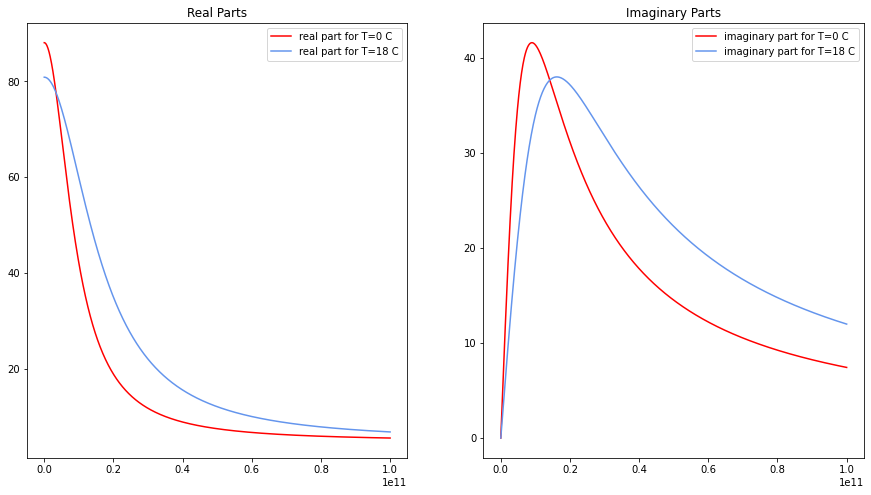

relax frq for T=0 9.00900900900901
relax frq for T=18 16.216216216216218


In [80]:
f = np.linspace(0, 100, 1000)*10**9


real_0,ima_0=dielectric_water(f,0)
real_18,ima_18=dielectric_water(f,18)

figure,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
ax1.plot(f,real_0,label='real part for T=0 C',color='red')
ax1.plot(f,real_18,label='real part for T=18 C',color='cornflowerblue')
ax1.set_title('Real Parts')
ax1.legend()

ax2.plot(f,-ima_0,label='imaginary part for T=0 C',color='red')
ax2.plot(f,-ima_18,label='imaginary part for T=18 C',color='cornflowerblue')
ax2.set_title('Imaginary Parts')

ax2.legend()

plt.show()

## Relaxation frequency
indx_1=np.argmin(ima_0)
indx_2=np.argmin(ima_18)

print('relax frq for T=0',f[indx_1]*10**(-9))
print('relax frq for T=18',f[indx_2]*10**(-9))



### Question 2

In [88]:
def soil_dialectric (T,frq,mv,S,C,rho_bulk = 1.54):

    # Get the values for water that is in the soil
    water_real,water_imaginary=dielectric_water(frq,T)

    e_w0 = static_dia_water(T)


    # Empirical relations for soil values
    alpha = 0.65
    beta_1 = 1.27 - 0.519*S - 0.152 * C
    beta_2 = 2.06 - 0.928*S - 0.255 * C
    sigma_eff = -1.645 +1.939*rho_bulk - 2.256 * S +1.594*C

    #Need to add the extra term in the imaginary part of water to compensate for the soil texture

    extra_term = (2.65-rho_bulk)/(2.65*mv) * sigma_eff/(2*np.pi*e_w0*frq)
    water_imaginary+=extra_term

    real_soil=(1+0.66*rho_bulk+mv**(beta_1) *water_real**(alpha) -mv )**(1/alpha)
    imaginary_soil=mv**(beta_2)*water_imaginary

    return real_soil, imaginary_soil


    

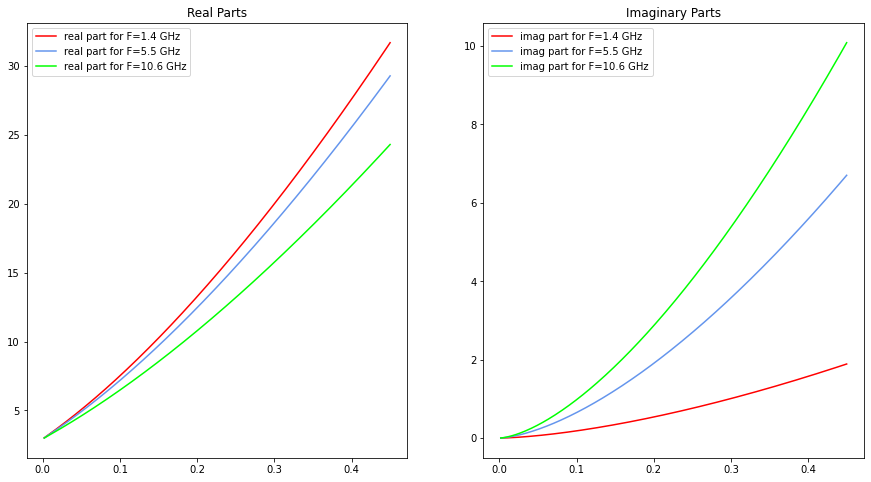

In [89]:
porosity=0.45
sand_frac = 0.51
clay_frac = 0.14
volumetric_soil_moisture = np.linspace(0,porosity,250)[1:]
T=18 #[C]
frequencies = np.array((1.4,5.5,10.6))*10**9

real_parts=[]
imaginary_parts=[]

for f in frequencies :
    real,imag=soil_dialectric(T,f,volumetric_soil_moisture,sand_frac,clay_frac)

    real_parts.append(real)
    imaginary_parts.append(imag)


figure,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))

ax1.plot(volumetric_soil_moisture,real_parts[0],label='real part for F=1.4 GHz',color='red')
ax1.plot(volumetric_soil_moisture,real_parts[1],label='real part for F=5.5 GHz',color='cornflowerblue')
ax1.plot(volumetric_soil_moisture,real_parts[2],label='real part for F=10.6 GHz',color='lime')
ax1.set_title('Real Parts')
ax1.legend()

ax2.plot(volumetric_soil_moisture,-imaginary_parts[0],label='imag part for F=1.4 GHz',color='red')
ax2.plot(volumetric_soil_moisture,-imaginary_parts[1],label='imag part for F=5.5 GHz',color='cornflowerblue')
ax2.plot(volumetric_soil_moisture,-imaginary_parts[2],label='imag part for F=10.6 GHz',color='lime')

ax2.set_title('Imaginary Parts')

ax2.legend()

plt.show()


### Question 3

In [3]:
# Smooth surface equations 
# Calculate the Fresnel reflection coefficients, then the reflectivity and with that the emissivity
def emmisivity_vv_smooth (theta, T,frq,mv,S,C):
    real_e, imag_e = soil_dialectric(T,frq,mv,S,C)
    e=real_e-imag_e*1j
    R_vv = (e * np.cos(theta) - np.sqrt (e - np.sin(theta)**2)) / (e * np.cos(theta) + np.sqrt (e - np.sin(theta)**2))
    rho_vv = np.abs (R_vv)*2
    emissivity_vv_smooth = 1 - rho_vv
    return emissivity_vv_smooth

def emissiovity_hh_smooth (theta, T,frq,mv,S,C):
    real_e, imag_e = soil_dialectric(T,frq,mv,S,C)
    e=real_e-imag_e*1j
    R_hh = (np.cos(theta) - np.sqrt (e - np.sin(theta)**2)) / (np.cos(theta) + np.sqrt (e - np.sin(theta)**2))
    rho_hh = np.abs (R_hh)*2
    emissivity_hh_smooth = 1 - rho_hh
    return emissivity_hh_smooth



In [ ]:
# Plot the results 
mv=np.linspace(0,1,100)

smooth_vv = 
smooth_hh = 


In [4]:
# Rough surface emissivity equations 
def emmisivity_vv_rough (theta, T,frq,mv,S,C, h):
    real_e, imag_e = soil_dialectric(T,frq,mv,S,C)
    e=real_e-imag_e*1j
    R_vv = (e * np.cos(theta) - np.sqrt (e - np.sin(theta)**2)) / (e * np.cos(theta) + np.sqrt (e - np.sin(theta)**2))
    rho_vv = np.abs (R_vv)*2
    rho_vv_rough = rho_vv * np.exp (-h * np.cos(theta)) 
    emissivity_vv_rough = 1 - rho_vv_rough
    return emissivity_vv_rough

def emissiovity_hh_rough (theta, T,frq,mv,S,C, h):
    real_e, imag_e = soil_dialectric(T,frq,mv,S,C)
    e=real_e-imag_e*1j
    R_hh = (np.cos(theta) - np.sqrt (e - np.sin(theta)**2)) / (np.cos(theta) + np.sqrt (e - np.sin(theta)**2))
    rho_hh = np.abs (R_hh)*2
    rho_hh_rough = rho_hh * np.exp (-h * np.cos(theta)) 
    emissivity_hh_rough = 1 - rho_hh_rough
    return emissivity_hh_rough

